In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.dropna(inplace=True)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df = df[~(df["clean_comment"].str.strip() == "")]
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat.chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajat.chauhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Define the preprocessing function
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()

    # Remove trailing and leading whitespaces
    comment = comment.strip()

    # Remove newline characters
    comment = re.sub(r'\n', ' ', comment)

    # Remove non-alphanumeric characters, except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stopwords but retain important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment

In [9]:
df["clean_comment"] = df["clean_comment"].apply(preprocess_comment)
df

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [10]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Step 1: Vectorize the comments using Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=10000)  # Bag of Words model with a limit of 1000 features

In [12]:
X = vectorizer.fit_transform(df['clean_comment']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
# Get the vocabulary mapping (word -> index)
vocab = vectorizer.vocabulary_

# Print the vocabulary mapping
for word, index in vocab.items():
    print(f"Word: '{word}' is at position {index}")

Word: 'family' is at position 3347
Word: 'never' is at position 6068
Word: 'tried' is at position 9235
Word: 'explain' is at position 3259
Word: 'still' is at position 8571
Word: 'time' is at position 9077
Word: 'like' is at position 5247
Word: 'kind' is at position 4985
Word: 'strange' is at position 8598
Word: 'creature' is at position 2194
Word: 'nonetheless' is at position 6128
Word: 'come' is at position 1849
Word: 'admire' is at position 285
Word: 'patience' is at position 6531
Word: 'acceptance' is at position 189
Word: 'compassion' is at position 1900
Word: 'developed' is at position 2581
Word: 'thing' is at position 9014
Word: 'buddhism' is at position 1367
Word: 'teach' is at position 8911
Word: 'much' is at position 5893
Word: 'lot' is at position 5350
Word: 'compatible' is at position 1902
Word: 'christianity' is at position 1691
Word: 'especially' is at position 3154
Word: 'considering' is at position 2013
Word: 'sin' is at position 8253
Word: 'suffering' is at position 86

In [14]:
# Sort vocabulary by index (position)
sorted_vocab = sorted(vocab.items(), key=lambda x: x[1])

# Display words and their positions
for word, index in sorted_vocab:
    print(f"Position {index}: Word = '{word}'")


Position 0: Word = '000'
Position 1: Word = '100'
Position 2: Word = '1000'
Position 3: Word = '10000'
Position 4: Word = '101'
Position 5: Word = '103'
Position 6: Word = '104'
Position 7: Word = '105'
Position 8: Word = '108'
Position 9: Word = '10k'
Position 10: Word = '10th'
Position 11: Word = '110'
Position 12: Word = '112'
Position 13: Word = '113'
Position 14: Word = '114'
Position 15: Word = '115'
Position 16: Word = '116'
Position 17: Word = '119'
Position 18: Word = '120'
Position 19: Word = '122'
Position 20: Word = '125'
Position 21: Word = '126'
Position 22: Word = '12th'
Position 23: Word = '130'
Position 24: Word = '140'
Position 25: Word = '148'
Position 26: Word = '150'
Position 27: Word = '1500'
Position 28: Word = '15000'
Position 29: Word = '15th'
Position 30: Word = '16'
Position 31: Word = '16th'
Position 32: Word = '17'
Position 33: Word = '180'
Position 34: Word = '180ml'
Position 35: Word = '1947'
Position 36: Word = '1948'
Position 37: Word = '1971'
Position 

In [15]:
df["clean_comment"][0]

'family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed thing buddhism teach'

In [16]:
vector = X[0]

In [17]:
import numpy as np

# Find the indices of non-zero values
non_zero_indices = np.nonzero(vector)[0]

# Print the indices where the vector has non-zero values
print("Indices of non-zero values:", non_zero_indices)


Indices of non-zero values: [ 189  285 1367 1849 1900 2194 2581 3259 3347 4985 5247 6068 6128 6531
 8571 8598 8911 9014 9077 9235]


In [18]:
non_zero_values = vector[non_zero_indices]
print("Values at non-zero positions:", non_zero_values)


Values at non-zero positions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1]


Out of all 10000 locations, only at these few values the value is non-zero

In [19]:
y = df['category']  
y

0        1
1        1
2       -1
3        0
4        1
        ..
37244    0
37245    1
37246    0
37247    1
37248    0
Name: category, Length: 36793, dtype: int64

In [20]:
import dagshub
dagshub.init(repo_owner='rajatchauhan99', repo_name='Youtube-Comment-Analysis-Chrome-Plugin', mlflow=True)

Accessing as rajatchauhan99

Initialized MLflow to track repo "rajatchauhan99/Youtube-Comment-Analysis-Chrome-Plugin"

Repository rajatchauhan99/Youtube-Comment-Analysis-Chrome-Plugin initialized!

In [21]:
# Set or create an experiment
mlflow.set_experiment("RF Baseline")

<Experiment: artifact_location='mlflow-artifacts:/198f9e4ecd574905a0253e7f599bd7b4', creation_time=1729179714164, experiment_id='0', last_update_time=1729179714164, lifecycle_stage='active', name='RF Baseline', tags={}>

{'-1': {'precision': 1.0, 'recall': 0.006060606060606061, 'f1-score': 0.012048192771084338, 'support': 1650.0}, '0': {'precision': 0.6686727906240101, 'recall': 0.8262230919765167, 'f1-score': 0.7391456582633054, 'support': 2555.0}, '1': {'precision': 0.6321564885496184, 'recall': 0.8402029169308814, 'f1-score': 0.7214810781377621, 'support': 3154.0}, 'accuracy': 0.6483217828509308, 'macro avg': {'precision': 0.7669430930578761, 'recall': 0.5574955383226681, 'f1-score': 0.4908916430573839, 'support': 7359.0}, 'weighted avg': {'precision': 0.7273108499700832, 'recall': 0.6483217828509308, 'f1-score': 0.5685484434544823, 'support': 7359.0}}


2024/10/18 08:17:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/18 08:18:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_Baseline_TrainTestSplit at: https://dagshub.com/rajatchauhan99/Youtube-Comment-Analysis-Chrome-Plugin.mlflow/#/experiments/0/runs/1f051ada01a649a28689e9da588d5f57.
2024/10/18 08:18:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/rajatchauhan99/Youtube-Comment-Analysis-Chrome-Plugin.mlflow/#/experiments/0.


Accuracy: 0.6483217828509308


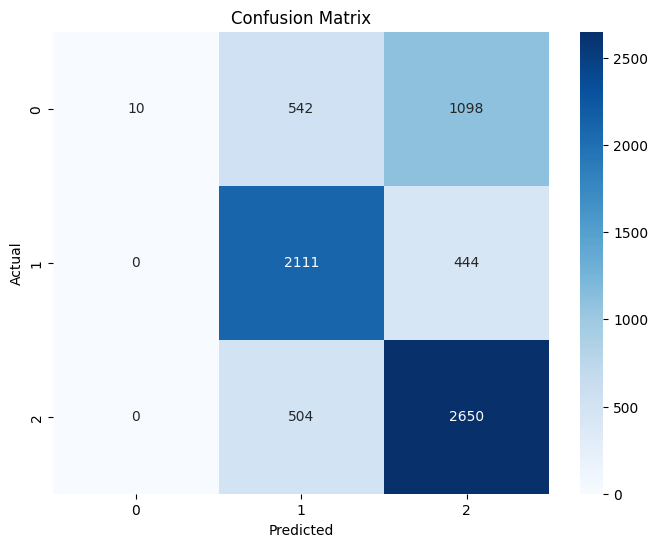

In [22]:
import mlflow

# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Define and train a Random Forest baseline model using a simple train-test split
with mlflow.start_run() as run:
    # Log a description for the run
    mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "RandomForestClassifier")

    # Add a description
    mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (BoW) with a simple train-test split")

    # Log parameters for the vectorizer
    mlflow.log_param("vectorizer_type", "CountVectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

    # Log Random Forest parameters
    n_estimators = 200
    max_depth = 15

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Log metrics for each class and accuracy
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    print(classification_rep)

    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):  # For precision, recall, f1-score, etc.
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Save and log the confusion matrix plot
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Log the Random Forest model
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Optionally log the dataset itself (if it's small enough)
    df.to_csv("dataset.csv", index=False)
    mlflow.log_artifact("dataset.csv")

# Display final accuracy
print(f"Accuracy: {accuracy}")

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.01      0.01      1650
           0       0.67      0.83      0.74      2555
           1       0.63      0.84      0.72      3154

    accuracy                           0.65      7359
   macro avg       0.77      0.56      0.49      7359
weighted avg       0.73      0.65      0.57      7359



Clearly, if we see the recall in negative class is almost 0, which is the ratio of correctly predicted samples of this category by total actual samples of this category.

Seems like one of the main reason for this would be the imbalanced data.

Some model performance improvement ideas:

1. Handling imbalanced dataset

   - oversampling
   - undersampling
   - smot 
   - tuning class_weight hyperparameter

2. Using complex model

   - Xgboost/ LightGM
   - Deep Learning techniques

3. Hyper-parameter tuning

   - Optuna (Bayesian optimization)

4. Ensemble techniques

   - Voting classifier 
   - Stacking

5. Feature Engineering (here we use basic bag of words technique but we can use)
  
   - BOW with n-grams like bi-grams and tri-grams
   - Emdeddings - word2vec
   - Custom Features/ Heuristics (Number of stop words/ number of vowels by consonants something like that)


6. Data Preprocessing

 



